<h1 align = "center" >MEDICAL EXPENDITURE PREDICTOR</h1>

<h2 align = center >Importing Data</h2>

In [85]:
import pandas as pd
import numpy as np
import pickle
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
medical_df = pd.read_csv("Dataset/medical.csv")

In [3]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<h2 align = center>Data Visualisation</h2>

In [51]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

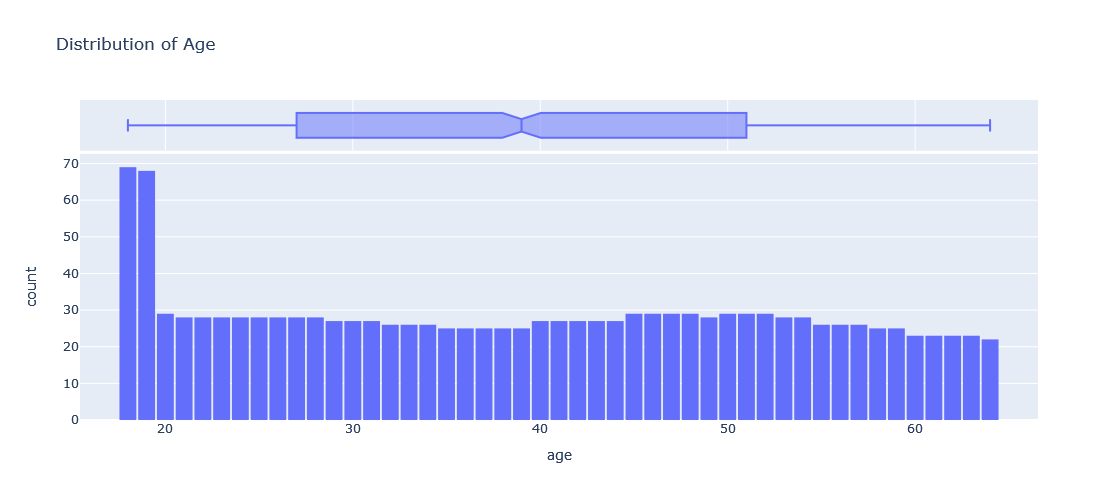

In [52]:
fig = px.histogram(medical_df,
                  x = 'age',
                  marginal = 'box',
                  nbins = 47,
                  title = 'Distribution of Age',
                  height = 500,
                  )
fig.update_layout(bargap = 0.1)

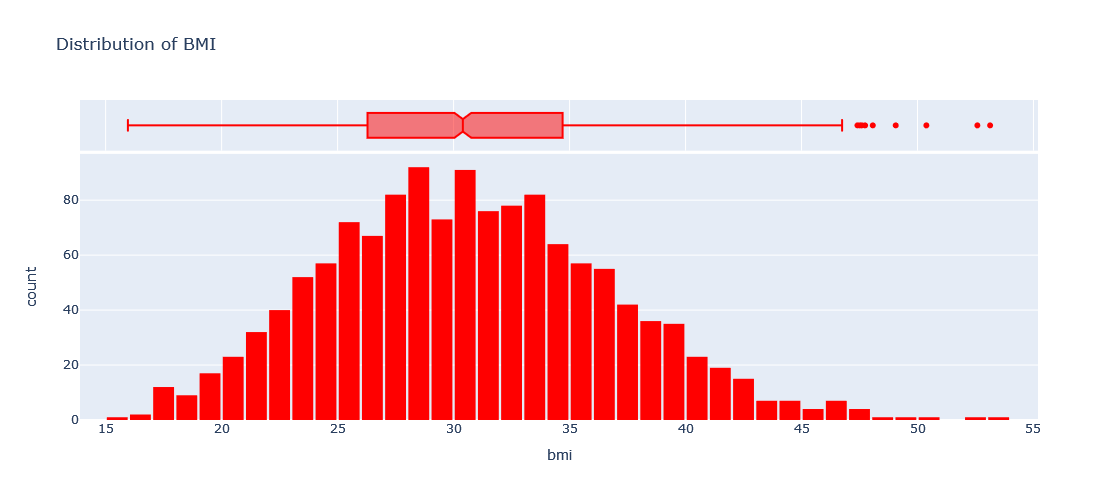

In [53]:
fig = px.histogram(medical_df,
                  x = 'bmi',
                  marginal = 'box',
                  nbins = 47,
                  color_discrete_sequence = ['red'],
                  title = 'Distribution of BMI',
                  height = 500,
                  )
fig.update_layout(bargap = 0.1)

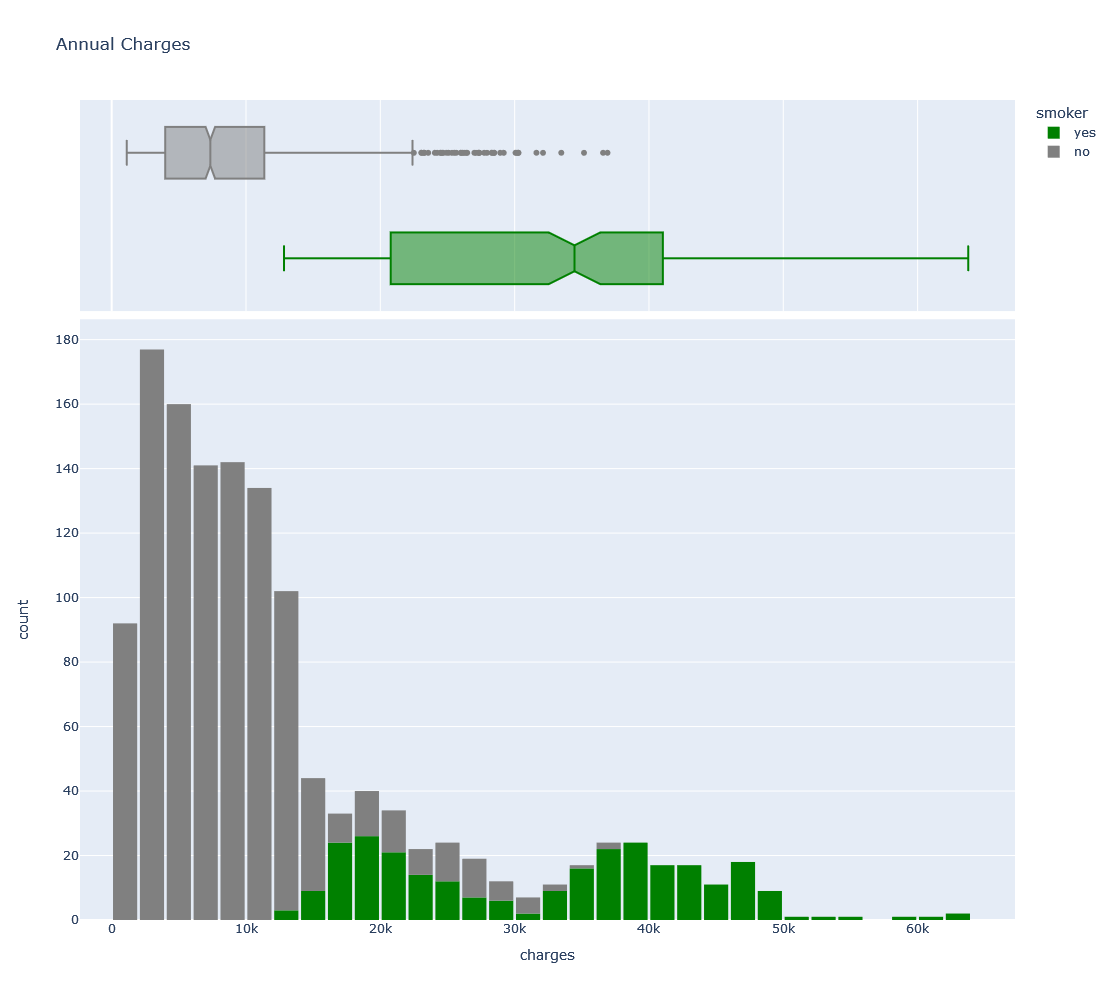

In [54]:
 fig = px.histogram(medical_df,
                    x = 'charges',
                    marginal = 'box',
                    color = 'smoker',
                    color_discrete_sequence=['green', 'grey'],
                    title = 'Annual Charges',
                    width=1000, height=1000)
fig.update_layout(bargap = 0.1)
fig.show()

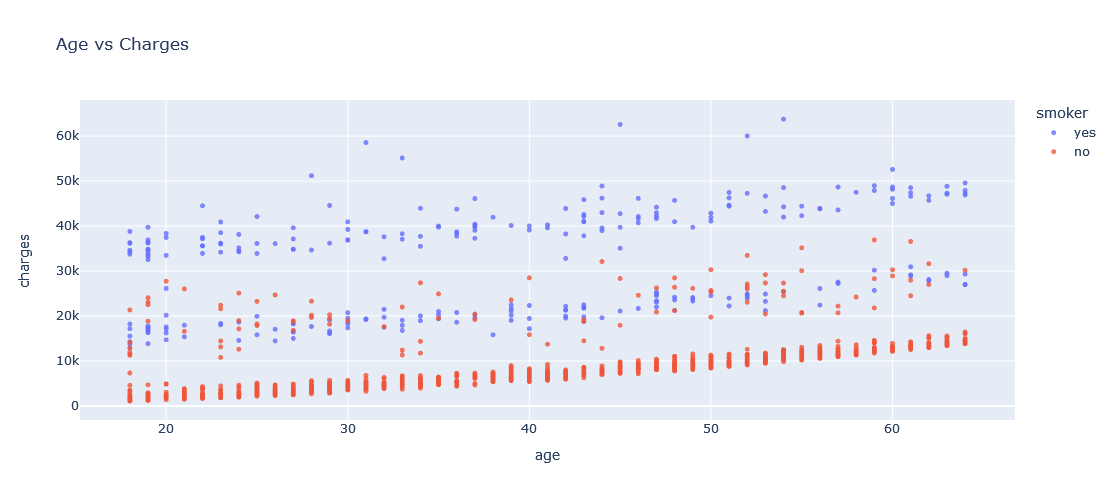

In [55]:
fig = px.scatter(medical_df,
                 x = 'age',
                 y = 'charges',
                 color = 'smoker',
                 opacity = 0.8, 
                 hover_data = ['sex'],
                 title = 'Age vs Charges',
                 width = 1000,
                 height = 500,
                )
fig.update_traces(marker_size = 5)
# fig.show()

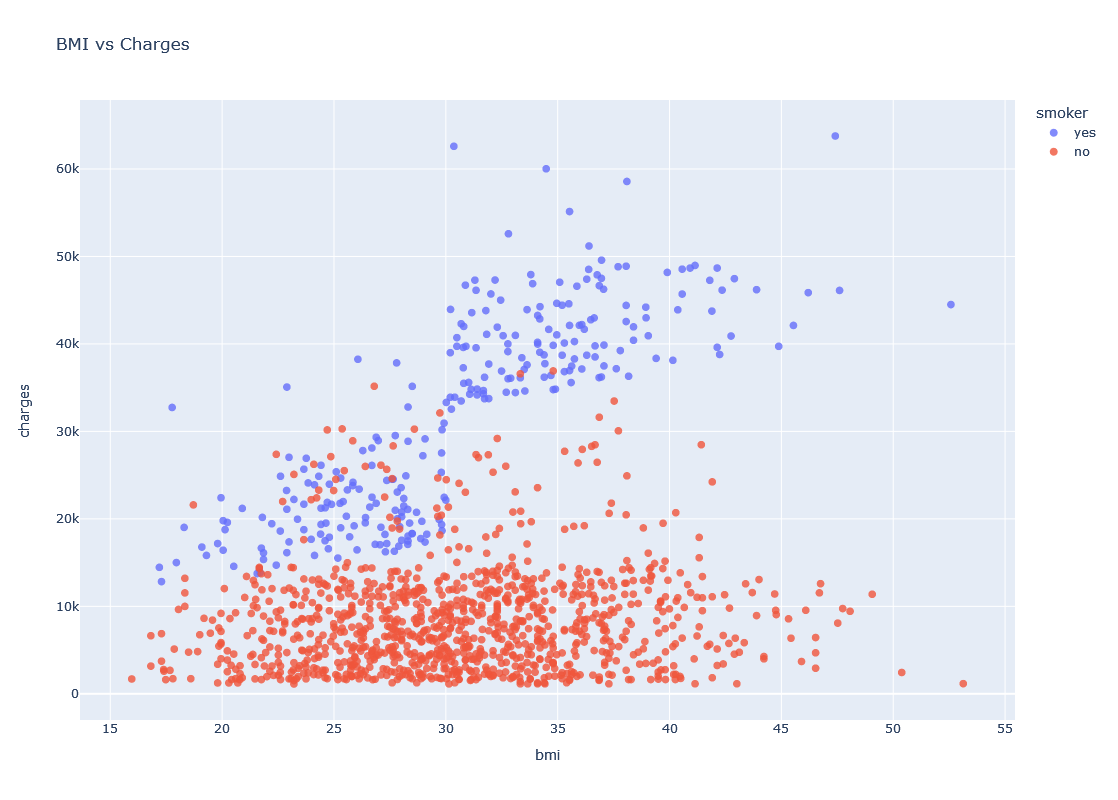

In [56]:
fig = px.scatter(medical_df,
                 x = 'bmi',
                 y = 'charges',
                 color = 'smoker',
                 opacity = 0.8, 
                 hover_data = ['sex'],
                 title = 'BMI vs Charges',
                 width = 1000,
                 height = 800,)
fig.update_traces(marker_size = 8)
# fig.show()

<h2 align = center>Finding Correlations between different features</h2>

<h3>Between <b>Charges</b> and <b>Age</b> </h3>

In [57]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

<h3>Between <b>BMI</b> and <b>Charges</b></h3>

In [58]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362878

<h3>Between <b>Smoker</b> and <b>Charges (Categorical data)</b></h3>

In [59]:
#Converting the yes and no of Smoker Column into 0 and 1 
smoker_values = { 'no' : 0 ,
                  'yes' : 1,}
smoker_num = medical_df.smoker.map(smoker_values) #map function

In [60]:
medical_df.charges.corr(smoker_num)

0.7872514304984782

<h3>Between <b>Sex</b> and <b>Charges</b></h3>

In [61]:
sex_values = { 'male' : 0 ,
              'female' : 1,}
sex_num = medical_df.sex.map(sex_values)

In [62]:
medical_df.charges.corr(sex_num)

-0.057292062202025346

In [63]:
#using pandas .corr() to display a table of correlation between each features
numerical_columns = medical_df.select_dtypes(include=['int', 'float']).columns
medical_df_nums = medical_df[numerical_columns]
medical_df_nums.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

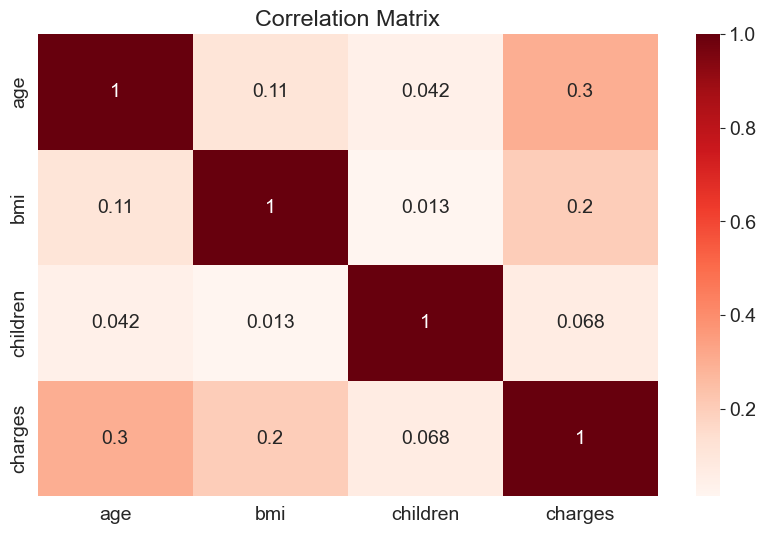

In [64]:
sns.heatmap(medical_df_nums.corr(),
            cmap ='Reds',
            annot = True,
           )
plt.title('Correlation Matrix')

<h2 align = center >PreProcessing <b>(OneHot Encoding and all)</b></h2>

<h3> Changing categorical <b>Smoker</b> to numerical <b> {0,1} </b></h3> 

In [4]:
smoker_codes = { 'no' : 0 ,
                 'yes' : 1 ,}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [5]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


<h3> Same for <b>Gender</b></h3>

In [6]:
gender_code = { 'female' : 0 ,
                'male' : 1 ,}
medical_df['gender_code'] = medical_df.sex.map(gender_code)
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,gender_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


<h3>Extracting numerical columns only</h3>

In [7]:
numerical_columns = medical_df.select_dtypes(include=['int', 'float']).columns
medical_df_nums = medical_df[numerical_columns]
medical_df_nums

,age,bmi,children,charges,smoker_code,gender_code
0,19,27.900,0,16884.92400,1,0
1,18,33.770,1,1725.55230,0,1
2,28,33.000,3,4449.46200,0,1
3,33,22.705,0,21984.47061,0,1
4,32,28.880,0,3866.85520,0,1
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


<h3>Doing <b>One-Hot Encoding</b> for <b>region column</b></h3>

In [8]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(medical_df[['region']])
one_hot = enc.transform(medical_df[['region']]).toarray()

In [11]:
medical_df_nums[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [12]:
input_df = medical_df_nums.copy()

In [13]:
input_df

,age,bmi,children,charges,smoker_code,gender_code,northeast,northwest,southeast,southwest
0,19,27.900,0,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,0,0,0.0,0.0,0.0,1.0


<h2 align = center > Creating <b>Features</b> and <b> Targets</b></h2>

In [14]:
input_df = input_df.drop(columns = 'charges')

In [15]:
input_df

,age,bmi,children,smoker_code,gender_code,northeast,northwest,southeast,southwest
0,19,27.900,0,1,0,0.0,0.0,0.0,1.0
1,18,33.770,1,0,1,0.0,0.0,1.0,0.0
2,28,33.000,3,0,1,0.0,0.0,1.0,0.0
3,33,22.705,0,0,1,0.0,1.0,0.0,0.0
4,32,28.880,0,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,0.0,1.0,0.0,0.0
1334,18,31.920,0,0,0,1.0,0.0,0.0,0.0
1335,18,36.850,0,0,0,0.0,0.0,1.0,0.0
1336,21,25.800,0,0,0,0.0,0.0,0.0,1.0


In [16]:
targets = medical_df['charges'].values
type(targets)

numpy.ndarray

<h3>Scaling the features</h3>

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
numerical_columns

Index(['age', 'bmi', 'children', 'charges', 'smoker_code', 'gender_code'], dtype='object')

In [20]:
scaling_columns = numerical_columns[:3].to_list()
type(scaling_columns)

list

In [21]:
scaler.fit(input_df[scaling_columns])

StandardScaler()

In [22]:
scaled_input_df = input_df.copy()
scaled_input_df[scaling_columns] = scaler.transform(input_df[scaling_columns])

In [23]:
input_df

,age,bmi,children,smoker_code,gender_code,northeast,northwest,southeast,southwest
0,19,27.900,0,1,0,0.0,0.0,0.0,1.0
1,18,33.770,1,0,1,0.0,0.0,1.0,0.0
2,28,33.000,3,0,1,0.0,0.0,1.0,0.0
3,33,22.705,0,0,1,0.0,1.0,0.0,0.0
4,32,28.880,0,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,0.0,1.0,0.0,0.0
1334,18,31.920,0,0,0,1.0,0.0,0.0,0.0
1335,18,36.850,0,0,0,0.0,0.0,1.0,0.0
1336,21,25.800,0,0,0,0.0,0.0,0.0,1.0


In [24]:
scaled_input_df

,age,bmi,children,smoker_code,gender_code,northeast,northwest,southeast,southwest
0,-1.438764,-0.453320,-0.908614,1,0,0.0,0.0,0.0,1.0
1,-1.509965,0.509621,-0.078767,0,1,0.0,0.0,1.0,0.0
2,-0.797954,0.383307,1.580926,0,1,0.0,0.0,1.0,0.0
3,-0.441948,-1.305531,-0.908614,0,1,0.0,1.0,0.0,0.0
4,-0.513149,-0.292556,-0.908614,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,0,1,0.0,1.0,0.0,0.0
1334,-1.509965,0.206139,-0.908614,0,0,1.0,0.0,0.0,0.0
1335,-1.509965,1.014878,-0.908614,0,0,0.0,0.0,1.0,0.0
1336,-1.296362,-0.797813,-0.908614,0,0,0.0,0.0,0.0,1.0


In [25]:
inputs = scaled_input_df.to_numpy()

In [26]:
inputs

array([[-1.43876426, -0.45332   , -0.90861367, ...,  0.        ,
         0.        ,  1.        ],
       [-1.50996545,  0.5096211 , -0.07876719, ...,  0.        ,
         1.        ,  0.        ],
       [-0.79795355,  0.38330685,  1.58092576, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, ...,  0.        ,
         1.        ,  0.        ],
       [-1.29636188, -0.79781341, -0.90861367, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.55168573, -0.26138796, -0.90861367, ...,  1.        ,
         0.        ,  0.        ]])

<h3>Splitting the <b>Training</b> and <b>Test</b> set</h3>

In [27]:
from sklearn.model_selection import train_test_split

In [43]:
input_train , input_test , target_train, target_test = train_test_split(inputs, targets, test_size = 0.2 , random_state = 0)

In [44]:
input_train

array([[-0.15714284,  0.56375578,  2.41077224, ...,  0.        ,
         0.        ,  1.        ],
       [-1.50996545,  0.61789045, -0.90861367, ...,  0.        ,
         1.        ,  0.        ],
       [-1.1539595 ,  0.98535009,  0.75107928, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.05646073, -0.91592544, -0.90861367, ...,  0.        ,
         1.        ,  0.        ],
       [-1.43876426,  0.79833938, -0.90861367, ...,  1.        ,
         0.        ,  0.        ],
       [-0.4419476 , -1.99533811, -0.07876719, ...,  0.        ,
         0.        ,  1.        ]])

In [45]:
input_test

array([[ 0.91087502, -0.0760177 , -0.07876719, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.55486907, -0.21217462, -0.07876719, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.62607026,  1.62430334,  0.75107928, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.26688097,  1.57755066, -0.90861367, ...,  0.        ,
         0.        ,  0.        ],
       [-0.65555117,  1.37577595,  1.58092576, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.48366788, -0.96267811,  1.58092576, ...,  0.        ,
         0.        ,  0.        ]])

In [33]:
print(f"Shape of input_train : {input_train.shape}")
print(f"Shape of input_test : {input_test.shape}")
print(f"Shape of target_train : {target_train.shape}")
print(f"Shape of target_test : {target_test.shape}")

Shape of input_train : (1070, 9)
Shape of input_test : (268, 9)
Shape of target_train : (1070,)
Shape of target_test : (268,)


<h2 align = center >Linear Regression using <b>Scikit : LinearRegressor</b></h2>

<h3><b>Training the model</b></h3>

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression()

In [46]:
model.fit(input_train,target_train)

LinearRegression()

In [47]:
columns = medical_df_nums.columns.to_list()
print(f"Feature names : {columns}")
print(f"Coefficients : {model.coef_}")
print(f"Intercept : {model.intercept_}")

Feature names : ['age', 'bmi', 'children', 'charges', 'smoker_code', 'gender_code', 'northeast', 'northwest', 'southeast', 'southwest']
Coefficients : [ 3.56314970e+03  2.04799829e+03  5.26495121e+02  2.36050173e+04
 -1.54637279e+01  4.83840068e+02  2.23707336e+02 -4.29438766e+02
 -2.78108638e+02]
Intercept : 8415.07009603954


<h3> <b>Predicting</b> the test set </h3>

In [48]:
lr_predicted = model.predict(input_test)

In [49]:
lr_predicted

array([1.11699271e+04, 9.48670909e+03, 3.81811231e+04, 1.62663133e+04,
       6.91464801e+03, 3.96348488e+03, 1.57939691e+03, 1.43852566e+04,
       9.01257970e+03, 7.50846068e+03, 4.49176728e+03, 1.02795839e+04,
       8.80129751e+03, 3.79802013e+03, 2.79262010e+04, 1.07151158e+04,
       1.12889756e+04, 6.10501768e+03, 8.24104117e+03, 2.71445089e+04,
       3.36440910e+04, 1.43551043e+04, 1.17372043e+04, 3.21374335e+04,
       4.17005913e+03, 9.25496051e+03, 1.08433751e+03, 9.80417085e+03,
       3.77104596e+03, 1.04318587e+04, 9.00931722e+03, 4.00749509e+04,
       1.56889543e+04, 1.38794545e+04, 2.47597127e+04, 5.16638285e+03,
       1.26109277e+04, 3.07691018e+04, 3.35498325e+04, 3.67154946e+03,
       3.97568613e+03, 3.98729942e+03, 3.05285774e+04, 3.95053023e+04,
       2.78105036e+04, 5.09258923e+03, 1.06042481e+04, 7.82952256e+03,
       3.59255553e+03, 1.02128745e+04, 5.72038147e+03, 3.42627499e+03,
       3.30210242e+04, 3.84738218e+04, 1.60534782e+04, 7.16491905e+03,
      

<h3>Checking for <b>R<sup>2</sup>score</b> and <b>loss</b></h3>

In [50]:
from sklearn.metrics import r2_score
score = r2_score(target_test, lr_predicted)

In [51]:
print(f"Score : {score}")

Score : 0.7999876970680434


In [52]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [54]:
rmse(target_test, lr_predicted)

5641.626558850189

<h2 align = center >Now, using <b>SGDRegressor</b></h2>

In [55]:
from sklearn.linear_model import SGDRegressor

In [56]:
sgdmodel = SGDRegressor()

In [57]:
sgdmodel.fit(input_train, target_train)

SGDRegressor()

In [58]:
print(f"Coefficients of SGD : {sgdmodel.coef_}")
print(f"Intercept SGD : {sgdmodel.intercept_}")

Coefficients of SGD : [ 3.52370762e+03  2.08540801e+03  5.19220197e+02  2.35583570e+04
 -1.27741907e+01  2.16298337e+03  1.88845597e+03  1.26380534e+03
  1.39751149e+03]
Intercept SGD : [6742.29882901]


In [60]:
sgd_predicted = sgdmodel.predict(input_test)
sgd_predicted

array([1.11372679e+04, 9.47793237e+03, 3.81597368e+04, 1.62537443e+04,
       6.80271036e+03, 3.93677798e+03, 1.62524972e+03, 1.43677270e+04,
       8.99366323e+03, 7.51713902e+03, 4.42968460e+03, 1.02085186e+04,
       8.78938264e+03, 3.80354451e+03, 2.79018225e+04, 1.06784144e+04,
       1.11929307e+04, 6.16295147e+03, 8.22502130e+03, 2.71675924e+04,
       3.35175015e+04, 1.43138292e+04, 1.17155582e+04, 3.20785828e+04,
       4.26721927e+03, 9.32577744e+03, 1.04672195e+03, 9.82525505e+03,
       3.79096268e+03, 1.04037596e+04, 8.97545608e+03, 4.00607344e+04,
       1.56784343e+04, 1.38879791e+04, 2.47064921e+04, 5.18844681e+03,
       1.26556162e+04, 3.07952306e+04, 3.35004172e+04, 3.75112841e+03,
       3.93134502e+03, 4.02902342e+03, 3.04720677e+04, 3.94336788e+04,
       2.78884487e+04, 5.14260937e+03, 1.05655215e+04, 7.79023342e+03,
       3.57185333e+03, 1.01429369e+04, 5.80466280e+03, 3.44672462e+03,
       3.29394369e+04, 3.84281076e+04, 1.60968032e+04, 7.24134631e+03,
      

In [61]:
sgd_score = r2_score(target_test,sgd_predicted)
print(sgd_score)

0.7997459152791884


In [62]:
print(rmse(target_test, sgd_predicted))

5645.035425617319


<h2 align = center > Now, using <b>Scratch codes</b></h2>

<h3>Defining the <b>model function</b></h3>

In [69]:
def sc_predict(x_train,w,b) :
    m, n = x_train.shape
    y = np.zeros(m)
    for i in range(m):
        y[i] = np.dot(x_train[i],w) + b
    return y

<h3>Defining the <b>Cost function</b></h3>

In [64]:
def cost(x_train,y_train,w,b) :
    m = x_train.shape[0]
    j = 0
    for i in range(m):
        f = np.dot(x_train[i],w) + b
        j += (y_train[i] - f)**2
    j = j / ( 2 * m )
    return j

<h3>Defining the <b>Gradient function</b></h3>

In [65]:
def grad(x_train, y_train , w , b) :
    m,n = x_train.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    for i in range(m):
        f = np.dot(x_train[i],w) + b
        for j in range(n):
            dj_dw[j] += (f - y_train[i])*x_train[i,j]
            dj_db += (f - y_train[i])
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw , dj_db

<h3>Defining the <b>Gradient Descent function</b></h3>

In [66]:
def grad_desc(x_train,y_train,w_in,b_in,alpha,iter) :
    m,n = x_train.shape
    w = w_in.copy()
    b = b_in
    for num in range(iter):
        dj_dw , dj_db = grad(x_train,y_train,w,b)
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
    return w , b

In [67]:
type(target_train)

numpy.ndarray

In [68]:
w_in = np.zeros(input_train.shape[1])
b_in = 0
alpha = 0.01
iter = 10000
w_f , b_f = grad_desc(input_train , target_train , w_in , b_in , alpha , iter)
print(w_f)
print(f"Intercept : {b_f}")

[ 3.56314963e+03  2.04799816e+03  5.26495186e+02  2.36050139e+04
 -1.54634641e+01  7.11274469e+02  4.51141477e+02 -2.02003904e+02
 -5.06746727e+01]
Intercept : 8187.636313712614


In [70]:
print(model.coef_)

[ 3.56314970e+03  2.04799829e+03  5.26495121e+02  2.36050173e+04
 -1.54637279e+01  4.83840068e+02  2.23707336e+02 -4.29438766e+02
 -2.78108638e+02]


In [71]:
print(model.intercept_)

8415.07009603954


In [72]:
sc_predicted = sc_predict(input_test,w_f,b_f)

In [73]:
print(sc_predicted)

[1.11699275e+04 9.48671015e+03 3.81811201e+04 1.62663136e+04
 6.91464850e+03 3.96348591e+03 1.57939766e+03 1.43852569e+04
 9.01258017e+03 7.50846143e+03 4.49176826e+03 1.02795844e+04
 8.80129768e+03 3.79802131e+03 2.79261983e+04 1.07151170e+04
 1.12889762e+04 6.10501859e+03 8.24104188e+03 2.71445065e+04
 3.36440883e+04 1.43551046e+04 1.17372048e+04 3.21374312e+04
 4.17006044e+03 9.25496129e+03 1.08433839e+03 9.80417198e+03
 3.77104712e+03 1.04318594e+04 9.00931771e+03 4.00749486e+04
 1.56889544e+04 1.38794547e+04 2.47597101e+04 5.16638351e+03
 1.26109290e+04 3.07690989e+04 3.35498294e+04 3.67154963e+03
 3.97568692e+03 3.98730081e+03 3.05285749e+04 3.95052994e+04
 2.78105012e+04 5.09258969e+03 1.06042493e+04 7.82952325e+03
 3.59255636e+03 1.02128756e+04 5.72038203e+03 3.42627560e+03
 3.30210213e+04 3.84738190e+04 1.60534789e+04 7.16491983e+03
 5.73920103e+03 9.45413350e+03 8.91062864e+03 1.17258864e+04
 1.85695682e+03 3.89143577e+04 1.48996743e+04 1.18049586e+04
 1.40504034e+04 1.405614

In [325]:
sc_predicted.shape

(268,)

In [327]:
input_test.shape

(268, 9)

In [74]:
sc_score = r2_score(target_test, sc_predicted)

In [83]:
print(sc_score)

0.7999876891516936


In [84]:
print(score)

0.7999876970680434


In [86]:
data = {
    'model' : model,
    'encoder' : enc,
    'scaler' : scaler,
}
with open("exp_predictor.pkl" , "wb") as file :
    pickle.dump(data,file)